In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

In [37]:

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

# Split the data into training and validation sets
def divide_data_and_target(data_set):
    data = []
    target = []
    for elem in data_set.values:
        data.append(elem[:-1])
        if(elem[-1] == 'tested_positive'):
            target.append(1)
        else:
            target.append(0)
    return data,target
data, target = divide_data_and_target(diabetes)

train_data, test_data, train_labels, test_labels = train_test_split(data, target,test_size=0.3, random_state=278830)

In [38]:
test_data = [list(x) for x in test_data]
train_data = [list(x) for x in train_data]

In [39]:

# Create the model
model = keras.Sequential(
    [
        Input(shape=8,),
        Dense(6, activation="relu"),
        Dense(3, activation="relu"),
    ]
)
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
training = model.fit(train_data, train_labels,validation_data=(test_data,test_labels), epochs=500, verbose=1)


Epoch 1/500
17/17 [==============================] - 1s 12ms/step - loss: 1.2374 - accuracy: 0.2179 - val_loss: 1.0989 - val_accuracy: 0.2468
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 1.1395 - accuracy: 0.3110 - val_loss: 1.0554 - val_accuracy: 0.3377
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 1.0398 - accuracy: 0.3650 - val_loss: 0.9744 - val_accuracy: 0.3636
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 0.9826 - accuracy: 0.3892 - val_loss: 0.9128 - val_accuracy: 0.3853
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 0.9388 - accuracy: 0.4004 - val_loss: 0.8072 - val_accuracy: 0.4026
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.9062 - accuracy: 0.4078 - val_loss: 0.7721 - val_accuracy: 0.4069
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.8849 - accuracy: 0.4227 - val_loss: 0.7550 - val_accuracy: 0.3896
Epoch 8/500


In [40]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(accuracy)

8/8 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.3723
0.3722943663597107


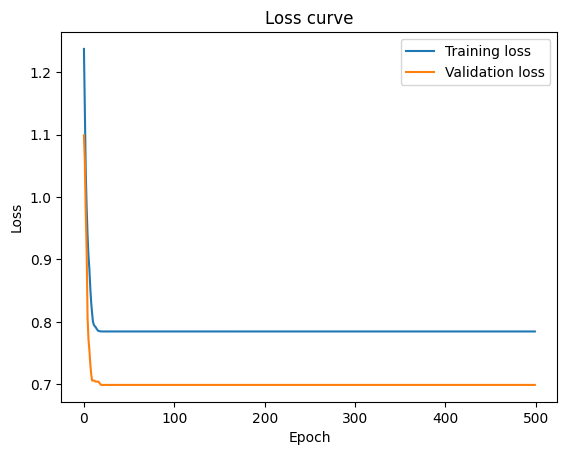

In [41]:
plt.plot(training.history['loss'], label='Training loss')
plt.plot(training.history['val_loss'], label='Validation loss')
plt.title('Loss curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()